# Import Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kendalltau
from scipy.stats import pearsonr

In [26]:
df = pd.read_csv('/content/data_clean.csv')

# EDA

##1. Churn based on Preferred Order Category & Complain

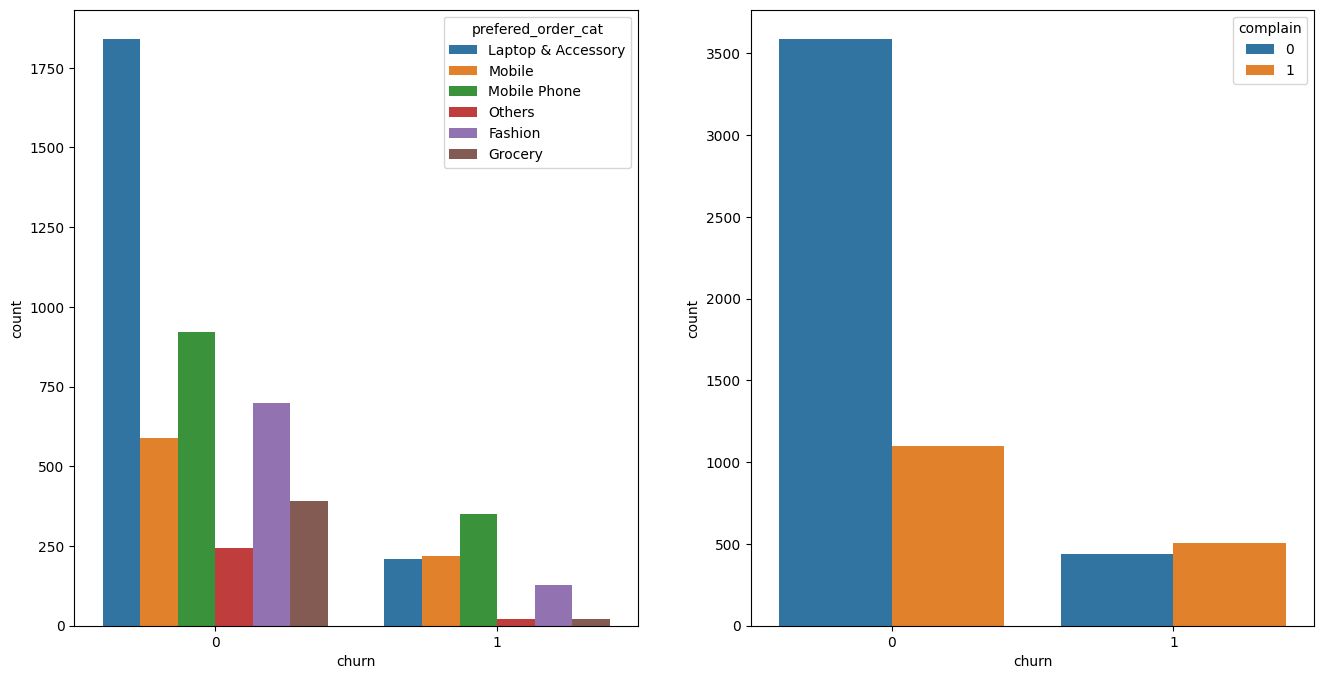

In [27]:
# membuat bar plot pada beberapa variabel kategory
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot(x='churn', hue='prefered_order_cat', data=df, ax=axs[0])
sns.countplot(x='churn', hue='complain', data=df, ax=axs[1])
# sns.countplot(x='churn', hue='tenure', data=df, ax=axs[2])
plt.show()

**Preferred Order Category**

Berdasarkan data dari customer yang *tidak churn*, *Laptop & Accessory* merupakan kategori yang secara signifikan lebih populer dibandingkan yang lainnya (38.4%) diikuti dengan *Mobile Phone*. Sementara itu, *Mobile Phone* juga menjadi kategori yang paling banyak datanya di antara customer yang *churn*. Dapat disimpulkan bahwa product tech merupakan jenis produk yang paling diminati oleh customer yang *churn* maupun *tidak churn*.

**Complain**

Jika melihat dataset customer churn berdasarkan complain, sedikit sekali customer *tidak churn* yang mengajukan *complain* (22.4%). Bertolak belakang dengan customer *churn*, 53.7% customer mengajukan complain yang lebih banyak dari customer yang *tidak complain*. Berdasarkan temuan sebelumnya yang menyatakan bahwa produk tech merupakan jenis produk yang paling populer, dapat disimpulkan bahwa customer yang *churn* memiliki keluhan dalam proses belanja produk tersebut.

##2. Pie Chart

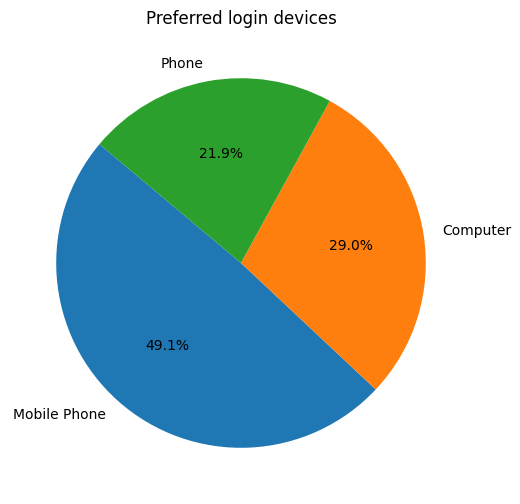

In [28]:
login_device = df['preferred_login_device'].value_counts()

plt.figure(figsize=(30, 6))
plt.pie(login_device, labels=login_device.index, autopct='%1.1f%%', startangle=140)
plt.title('Preferred login devices')
plt.show()

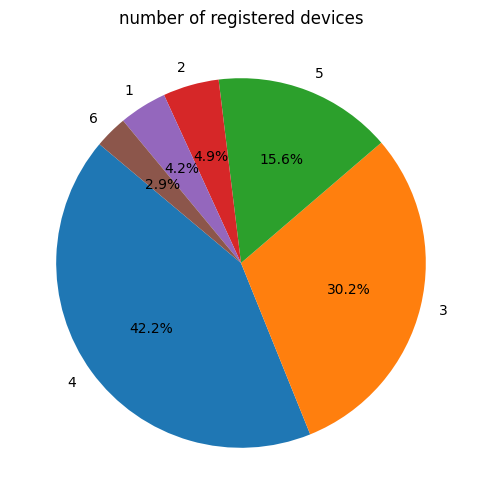

In [29]:
device_registered = df['number_of_device_registered'].value_counts()

plt.figure(figsize=(30, 6))
plt.pie(device_registered, labels=device_registered.index, autopct='%1.1f%%', startangle=140)
plt.title('number of registered devices')
plt.show()

**Preferred login device**

Selain menjadi kategori yang cukup populer untuk dibelanjakan, *Mobile Phone* dan *Computer* (yang juga bisa melalui laptop) juga merupakan login device yang digunakan untuk berbelanja e-commerce, di mana *Mobile Phone* dan *Phone* mewakili sekitar 70% preferred login device dari dataset. Dapat dikorelasikan dengan temuan sebelumnya bahwa customer yang *churn* maupun *tidak churn* menggunakan layanan e-commerce untuk mengganti perangkat-perangkat yang sekarang sedang digunakan.

**Number of Registered Devices**

Untuk melakukan pembelanjaan pada e-commerce, tidak sedikit customer yang meregistrasikan lebih dari 1 perangkat. Dari dataset yang ada, customer paling banyak meregistrasikan 4 (42.2%) dan 3 (30.2%) devices. Mengacu pada pie chart sebelumnya, multiple devices yang diregistrasi dapat berupa memakai lebih dari 1 *Mobile Phone* atau *Computer*. Dengan asumsi bahwa kebanyakan customer sedang mencari pengganti perangkat, registered devices yang lebih banyak dapat mengindikasikan pencarian promosi & diskon yang paling besar.

##3. Tenure & Day Since Last Order

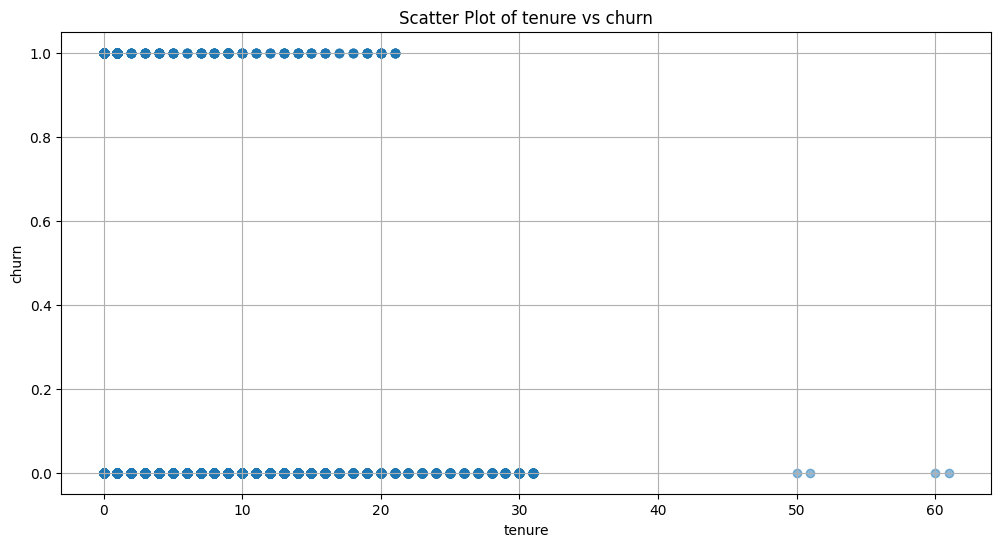

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(df['tenure'], df['churn'], alpha=0.5)
plt.title('Scatter Plot of tenure vs churn')
plt.xlabel('tenure')
plt.ylabel('churn')
plt.grid(True)
plt.show()

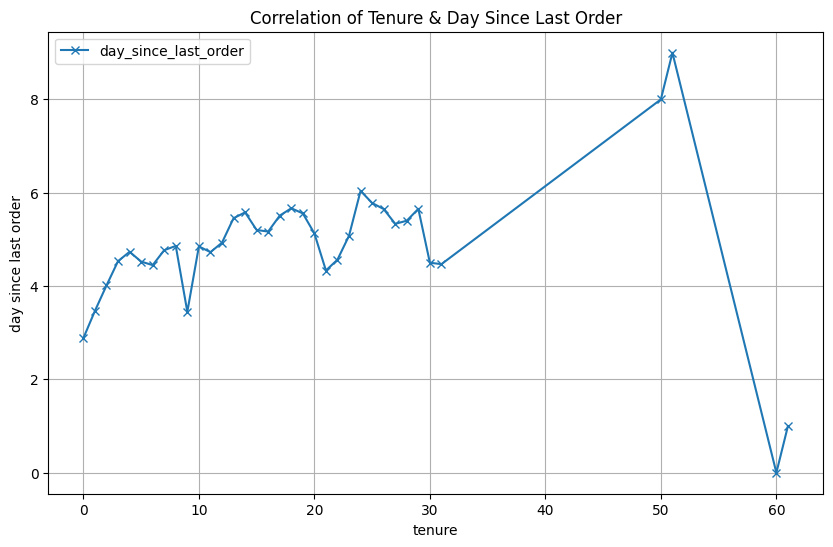

In [31]:
grouped = df.groupby('tenure')[['day_since_last_order']].mean()
grouped.plot(kind='line', marker='x', figsize=(10, 6))

plt.xlabel('tenure')
plt.ylabel('day since last order')
plt.title('Correlation of Tenure & Day Since Last Order')

plt.grid(True)
plt.show()

Mengacu pada tau-correlation, ditemukan bahwa terdapat korelasi negatif antara *tenure* dan *churn*, ini berarti semakin tinggi nilai tenure (jumlah hari yang dihabiskan) pada situs e-commerce, semakin rendah kemungkinan customer untuk *churn*.

**churn & tenure**

Ditemukan bahwa tenure customer yang *tidak churn* memiliki kesamaan dengan customer *churn* sampai dengan nilai 21. Ini menunjukkan bahwa hari ke 21 merupakan penentuan apakah customer akan tetap menggunakan layanan e-commerce yang sama atau beralih ke platform yang lain. Pembeda antara customer yang *churn* dan *tidak churn* adalah kepuasan menggunakan layanan e-commerce dan berhasil atau tidaknya mendapatkan perangkat baru yang dicari.

**tenure & day since last order**

Terdapat korelasi positif antara *tenure* dan *day since last order*. Mengacu pada findings sebelumnya, setelah hari ke 21 semakin tinggi juga nilai *day since last order*. Bagian tersebut mewakili customer yang *tidak churn* dan masih menggunakan aplikasi sehingga masih menempatkan order pada layanan e-commerce.

##4. Cashback Amount

<Figure size 3000x600 with 0 Axes>

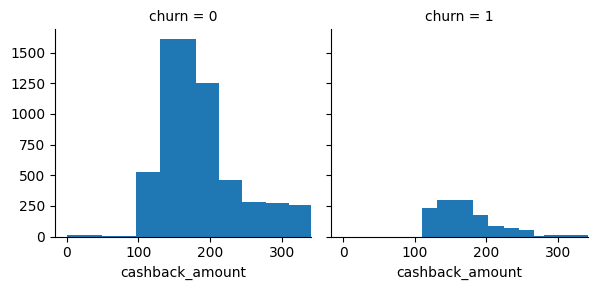

In [32]:
plt.figure(figsize=(30, 6))
grid = sns.FacetGrid(df, col='churn')
grid.map(plt.hist, 'cashback_amount', width=50)
grid.add_legend()

Pada customer yang *tidak churn*, distribusi nominal cashback jauh lebih tinggi dibandingkan customer yang *churn*. Ini menandakan bahwa customer yang *tidak churn* mendapatkan nominal cashback yang besar sehingga merasa puas berbelanja pada layanan e-commerce. Sebaliknya, customer yang *churn* tidak mendapatkan nominal cashback yang cukup yang menyebabkan kegiatan berbeanja tidak sesuai budget dan merasakan ketidakpuasan sehingga akhirnya memutuskan untuk beralih ke layanan lainnya.